In [1]:
#titanic dataset preprocessing
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pandas as pd
import numpy as np
# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, precision_recall_curve

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('train.csv')
#мы не должны пока тренировать - только обработать.

In [3]:
df['title'] = df['Name'].apply(lambda v: v.split(',')[1].strip().split('.')[0])
df.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [4]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked,title
count,891,891,891,204,889,891
unique,891,2,681,147,3,17
top,"Thomas, Master. Assad Alexander",male,347082,B96 B98,S,Mr
freq,1,577,7,4,644,517


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


# Age inputation

In [8]:
# Only two missing values in Embarked, fill them in with median = "S"
df['Embarked'] = df['Embarked'].fillna('S')

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


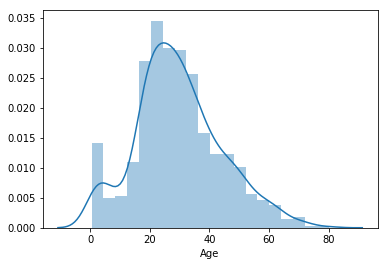

In [9]:
sns.distplot(df['Age'].dropna())

In [10]:
FREQ,DIAP = np.histogram(df[['Age']].dropna(), bins=np.linspace(0,90,19))

In [11]:
list(zip(FREQ,DIAP))

[(40, 0.0),
 (22, 5.0),
 (16, 10.0),
 (86, 15.0),
 (114, 20.0),
 (106, 25.0),
 (95, 30.0),
 (72, 35.0),
 (48, 40.0),
 (41, 45.0),
 (32, 50.0),
 (16, 55.0),
 (15, 60.0),
 (4, 65.0),
 (6, 70.0),
 (0, 75.0),
 (1, 80.0),
 (0, 85.0)]

In [12]:
URN=[]
for a,b in list(zip(FREQ,DIAP)):
    for i in range(0,a):
        URN.append(b)
URN=np.array(URN)
URN

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20

In [13]:
ELT = np.random.choice(URN, 1)
ELT

array([5.])

In [14]:
import math
def myfunc(val):
    if math.isnan(val):
        return np.random.choice(URN,1)
    else:
        return val
vfunc = np.vectorize(myfunc)
df[['Age']] = vfunc(df[['Age']].values)

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.366072,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.353609,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [17]:
CABINS=dict(filter(lambda v: v[1] > 1, Counter(df['Cabin'].dropna().values).items()))
CABINURN=[]
for k in CABINS:
    for i in range(0,CABINS[k]):
        CABINURN.append(k)
CABINURN[:10]

['C123',
 'C123',
 'G6',
 'G6',
 'G6',
 'G6',
 'C23 C25 C27',
 'C23 C25 C27',
 'C23 C25 C27',
 'C23 C25 C27']

In [18]:
import random
def myfunc(val):
    #print(type(val),val)
    #print(val)
    if type(val)==type(3.14):
        return str(random.sample(CABINURN,1)[0])
    else:
        return val
vfunc = np.vectorize(myfunc)
df[['Cabin']]=vfunc(df[['Cabin']].values).flatten()
#df[['Cabin']].values
#df[['Cabin']] = vfunc(df[['Cabin']].values)
#df[['Cabin']]

In [19]:
import re
def distance(a, b):
    a, b = re.sub('[\.\,\\\/]', '', a.lower()), b.lower()
    if len(a) > len(b):
        a, b = b, a

    n, m = len(a), len(b)
    
    current_row = range(n + 1) # Keep current and previous row, not entire matrix
    for i in range(1, m + 1):
        previous_row, current_row = current_row, [i]+[0]*n
        for j in range(1,n + 1):
            add, delete, change = previous_row[j]+1, current_row[j-1]+1, previous_row[j-1]
            if a[j-1] != b[i-1]:
                change += 1
            current_row[j] = min(add, delete, change)

    return current_row[n]


def myfunc(val):
    return distance(val,str(df[['Ticket']].values[0]))
vfunc = np.vectorize(myfunc)
df[['Ticket']]=vfunc(df[['Ticket']].values).flatten()

# Categorical to numerical

In [20]:
df.describe(include=['O'])

,Name,Sex,Cabin,Embarked,title
count,891,891,891,891,891
unique,891,2,147,3,17
top,"Thomas, Master. Assad Alexander",male,B96 B98,S,Mr
freq,1,577,31,646,517


In [21]:
from sklearn import preprocessing

df2=df.copy()
df2=df2.drop(['Name'],axis=1)

for L in ['Sex','title','Embarked','Cabin','Ticket']:
    le = preprocessing.LabelEncoder()
    df2[[L]] = le.fit_transform(df[[L]].values.ravel())

df2.head(11)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,1,22.0,1,0,0,7.2500,94,2,11
1,2,1,1,0,38.0,1,0,5,71.2833,81,0,12
2,3,1,3,0,26.0,0,0,7,7.9250,141,2,8
3,4,1,1,0,35.0,1,0,6,53.1000,55,2,12
4,5,0,3,1,35.0,0,0,7,8.0500,96,2,11
5,6,0,3,1,30.0,0,0,7,8.4583,58,1,11
6,7,0,1,1,54.0,0,0,6,51.8625,129,2,11
7,8,0,3,1,2.0,3,1,8,21.0750,137,2,7
8,9,1,3,0,27.0,0,2,7,11.1333,80,2,12
9,10,1,2,0,14.0,1,0,6,30.0708,34,0,12


In [22]:
CLASS=df2[['Survived']].values
df2=df2.drop('Survived',axis=1)
df2['Survived']=CLASS
df2.to_csv('newtrain.csv',index=False)

In [23]:
df2.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.647587,29.366072,0.523008,0.381594,6.233446,32.204208,79.437710,1.536476,10.241302,0.383838
std,257.353842,0.836071,0.477990,14.353609,1.102743,0.806057,1.014193,49.693429,40.452737,0.791503,1.830798,0.486592
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,20.000000,0.000000,0.000000,6.000000,7.910400,47.000000,1.000000,8.000000,0.000000
50%,446.000000,3.000000,1.000000,28.000000,0.000000,0.000000,6.000000,14.454200,78.000000,2.000000,11.000000,0.000000
75%,668.500000,3.000000,1.000000,38.000000,1.000000,0.000000,7.000000,31.000000,116.000000,2.000000,11.000000,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,9.000000,512.329200,146.000000,2.000000,16.000000,1.000000
